In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Google.csv')

In [3]:
df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d')
df = df.set_index('Date')

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-26,1157.260010,1169.469971,1152.959961,1168.890015,1168.890015,1226100
2019-08-27,1180.530029,1182.400024,1161.449951,1167.839966,1167.839966,1077200
2019-08-28,1161.709961,1176.420044,1157.300049,1171.020020,1171.020020,802000
2019-08-29,1181.119995,1196.060059,1181.119995,1192.849976,1192.849976,1088400
2019-08-30,1198.500000,1198.500000,1183.802979,1188.099976,1188.099976,1129800


In [6]:
forecast_out = 10
df['Prediction'] = df['Adj Close'].shift(-forecast_out)

In [7]:
x = np.array(df.drop(['Prediction'], 1))
x = x[:-forecast_out]

In [8]:
y = np.array(df['Prediction'])
y = y[:-forecast_out]

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [10]:
linear_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()

linear_model.fit(x_train, y_train)
ridge_model.fit(x_train, y_train)
lasso_model.fit(x_train, y_train)

Lasso()

In [11]:
linear_model_score = linear_model.score(x_test, y_test)
print('LinearModel score:', linear_model_score)

ridge_model_score = ridge_model.score(x_test, y_test)
print('RidgeModel score:', ridge_model_score)

lasso_model_score = lasso_model.score(x_test, y_test)
print('LassoModel score:', lasso_model_score)

LinearModel score: 0.9938133048772353
RidgeModel score: 0.9938133055440999
LassoModel score: 0.9936384753765912


In [12]:
x_forecast = np.array(df.drop(['Prediction'], 1))[-forecast_out:]
linear_model_forecast_prediction = linear_model.predict(x_forecast)
linear_model_real_prediction = linear_model.predict(np.array(df.drop(['Prediction'], 1)))
ridge_model_forecast_prediction = ridge_model.predict(x_forecast)
ridge_model_real_prediction = ridge_model.predict(np.array(df.drop(['Prediction'], 1)))
lasso_model_forecast_prediction = lasso_model.predict(x_forecast)
lasso_model_real_prediction = lasso_model.predict(np.array(df.drop(['Prediction'], 1)))

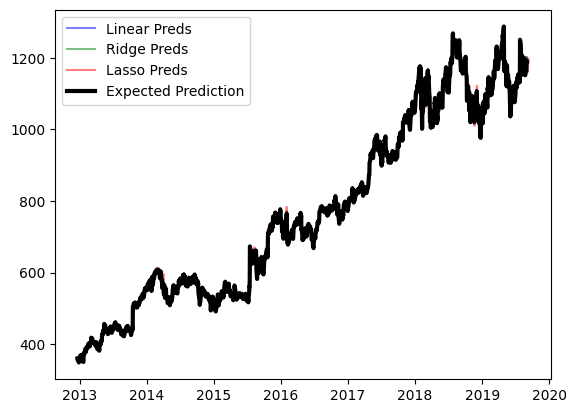

In [13]:
predicted_dates = []
recent_date = df.index.max()
display_at = 2100
alpha = 0.5

for i in range(forecast_out):
    recent_date += timedelta(days=1)
    predicted_dates.append(recent_date)

plt.plot(df.index[display_at:], linear_model_real_prediction[display_at:], label='Linear Preds', c='blue', alpha=alpha)
plt.plot(predicted_dates, linear_model_forecast_prediction, c='blue', alpha=alpha)
plt.plot(df.index[display_at:], ridge_model_real_prediction[display_at:], label='Ridge Preds', c='green', alpha=alpha)
plt.plot(predicted_dates, ridge_model_forecast_prediction, c='green', alpha=alpha)
plt.plot(df.index[display_at:], lasso_model_real_prediction[display_at:], label='Lasso Preds', c='red', alpha=alpha)
plt.plot(predicted_dates, lasso_model_forecast_prediction, c='red', alpha=alpha)
plt.plot(df.index[display_at:], df['Close'][display_at:], label='Expected Prediction', c='black', linewidth=3)
plt.legend()